## Práctica 1
### Elizaveta Gilyarovskaya
### Parte IV: Operadores Morfologicos

https://stackoverflow.com/questions/59012906/custom-erosion-results-do-not-match-with-opencv-erosion

In [1]:
from PIL import Image
import os
import PIL
import numpy as np
import matplotlib.pyplot as plt

In [2]:
imagenes = [i for i in os.listdir() if i[-3::]== 'png']
morf = Image.open(imagenes[5])
# Convertimos la imagen RGB a otro espacio de color donde tengamos en un plano la “luminancia”, como LAB.
# Asi solo utilizaremos la componente de luminaria, en este caso L.
if morf.mode != "L":
    morf = morf.convert("L")
    
im = np.array(morf)
im_neg = 255-im

# Erosionado

Implementaré los filtros morfológicos **de la misma forma que lo vimos en clase, con elemento estructurante lleno de pixeles de valor 255**, pero dado que la imágen que se proporciona está en positivo, es importante comentar que tras la aplicación de Erosionado, el resultado será realmente un Erosionado del fondo, de lo blanco.    
De la misma forma, **en dilatado se dilatará el fondo (lo blanco)**.

In [3]:
def Erosionado(I, kernel_size):
    kernel_size = 3 if kernel_size < 3 else kernel_size

    kernel = np.full(shape=(kernel_size, kernel_size), fill_value=255)
    
    pad_width = kernel_size - 2 # tamaño óptimo de padding para la superposición del kernel

    # Aplicamos padding de tamaño óptimo
    padded = np.pad(array=I, pad_width=pad_width, mode='constant')
   
    
    # sub matrices of kernel size
    submatrices = np.array(
        [padded[i:(i + kernel_size), j:(j + kernel_size)]
        for i in range(padded.shape[0] - pad_width*2) for j in range(padded.shape[1] - pad_width*2)
        ])

    # condition to replace the values - if the kernel equal to submatrix then 255 else 0
    image_erode = np.array([255 if (i == kernel).all() else 0 for i in submatrices])
    image_erode = image_erode.reshape(I.shape)
    image_erode = np.uint8(np.clip(image_erode,0,255))
    
    return image_erode

kernel_size = 16
s = Erosionado(im, kernel_size) 

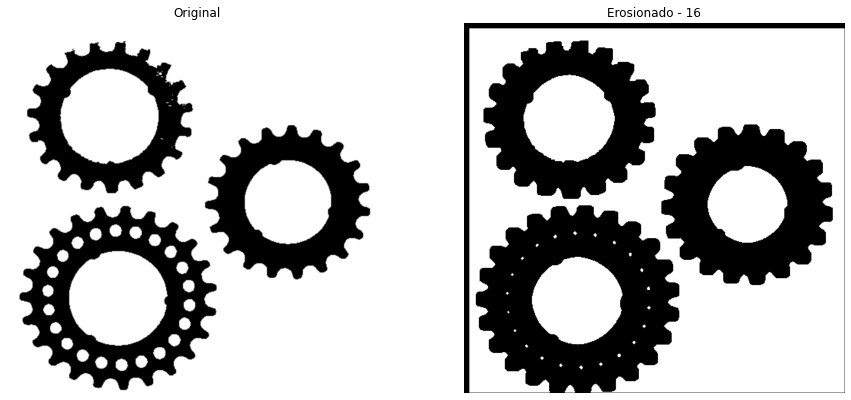

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
ax1.axis("off")
ax1.title.set_text('Original')
ax2.axis("off")
ax2.title.set_text(f"Erosionado - {kernel_size}")
ax1.imshow(im, cmap='gray')
ax2.imshow(s, cmap='gray')
plt.show()

# Dilatado

In [5]:
def Dilatado(I, kernel_size):
    kernel_size = 3 if kernel_size < 3 else kernel_size

    kernel = np.full(shape=(kernel_size, kernel_size), fill_value=255)
    
    pad_width = kernel_size - 2 # tamaño óptimo de padding para la superposición del kernel

    # Aplicamos padding de tamaño óptimo
    padded = np.pad(array=I, pad_width=pad_width, mode='constant')
   
    
    # sub matrices of kernel size
    submatrices = np.array(
        [padded[i:(i + kernel_size), j:(j + kernel_size)]
        for i in range(padded.shape[0] - pad_width*2) for j in range(padded.shape[1] - pad_width*2)
        ])

    # condition to replace the values - if the kernel equal to submatrix then 255 else 0
    dilated = np.array([255 if (i == kernel).any() else 0 for i in submatrices])
    dilated = dilated.reshape(I.shape)
    dilated = np.uint8(np.clip(dilated,0,255))
    
    return dilated

s1 = Dilatado(im, kernel_size) 

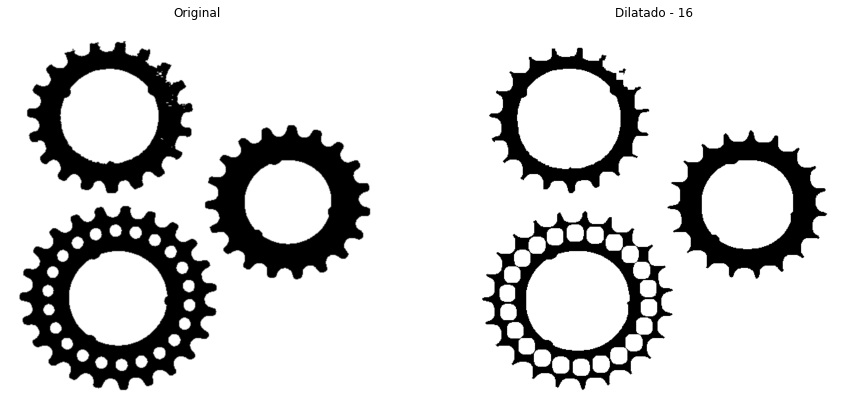

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
ax1.axis("off")
ax1.title.set_text('Original')
ax2.axis("off")
ax2.title.set_text(f"Dilatado - {kernel_size}")
ax1.imshow(im, cmap='gray')
ax2.imshow(s1, cmap='gray')
plt.show()

# Cierre

In [15]:
def Cierre(I, kernel_size_dilatado, kernel_size_erosionado):
    return Erosionado(Dilatado(I,kernel_size_dilatado), kernel_size_erosionado)

s3 = Cierre(im, 21,21)

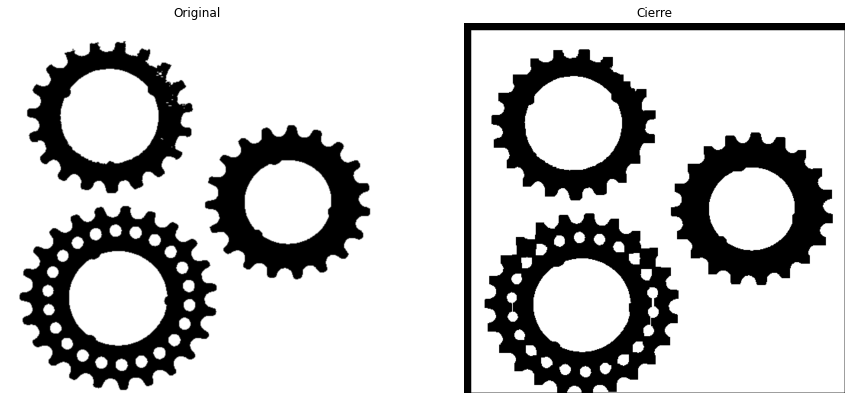

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
ax1.axis("off")
ax1.title.set_text('Original')
ax2.axis("off")
ax2.title.set_text(f"Cierre")
ax1.imshow(im, cmap='gray')
ax2.imshow(s3, cmap='gray')
plt.show()

# Apertura

In [13]:
def Apertura(I, kernel_size_erosionado, kernel_size_dilatado):
    return Dilatado(Erosionado(I,kernel_size_erosionado), kernel_size_dilatado)

s4 = Apertura(im, 21,21)

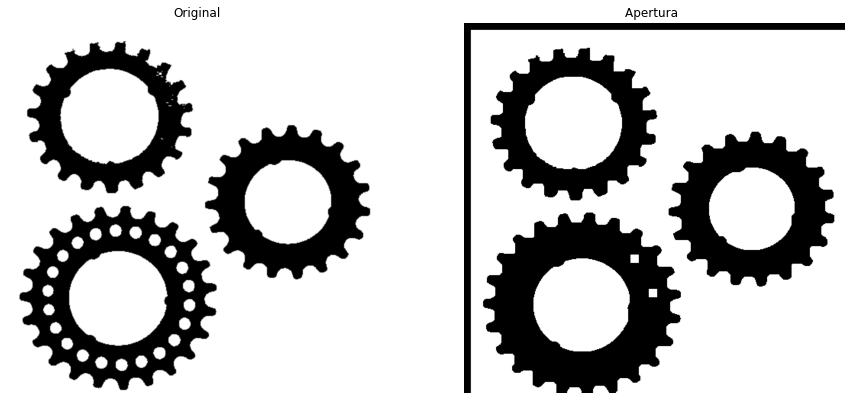

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
ax1.axis("off")
ax1.title.set_text('Original')
ax2.axis("off")
ax2.title.set_text(f"Apertura ")
ax1.imshow(im, cmap='gray')
ax2.imshow(s4, cmap='gray')
plt.show()

## P.D. Las mismas funciones aplicadas a la misma imágen pero en negativo:

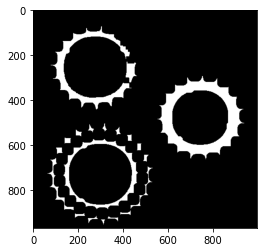

In [29]:
s_ = Erosionado(im_neg, kernel_size) 
plt.imshow(s1, cmap='gray')

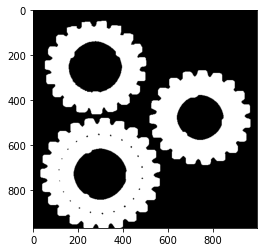

In [31]:
s_1 = Dilatado(im_neg, kernel_size) 
plt.imshow(s_1, cmap='gray')